<a href="https://colab.research.google.com/github/AthithyaJB/AthithyaJB/blob/main/AThi_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
# import tensorflow as tf

In [5]:
df_abbrev = pd.read_excel('ABBREV.xlsx')
df_agr = pd.read_excel('Agriculture_Dataset_text.xlsx')
df_nut = pd.read_excel('daily_nutrients.xlsx')

In [7]:
for col in df_agr.columns:
    if col != 'Area' and col != 'Year':
        df_agr[col] = df_agr[col].astype('float')
df_agr = df_agr.drop(columns=['Unnamed: 30'])

In [8]:
products = [el[:-29] for el in df_agr.columns[2:-1:2]]

In [9]:
cereals = [item for item  in list(df_abbrev['Shrt_Desc']) if 'cereals' in item.lower() and not 'rice' in item.lower()][0]

eggs = [item for item  in list(df_abbrev['Shrt_Desc']) if 'egg' in item.lower()][1]

meat_buffalo = [item for item  in list(df_abbrev['Shrt_Desc']) if 'meat' in item.lower() and 'buffalo' in item.lower()][0]
meat_cattle = [item for item  in list(df_abbrev['Shrt_Desc']) if 'meat' in item.lower()][549]
meat_chicken = [item for item  in list(df_abbrev['Shrt_Desc']) if 'chicken' in item.lower()][153]
meat_goat = [item for item  in list(df_abbrev['Shrt_Desc']) if 'meat' in item.lower() and 'goat' in item.lower()][0]
meat_pig = [item for item  in list(df_abbrev['Shrt_Desc']) if 'pork' in item.lower()][269]
meat_sheep = [item for item  in list(df_abbrev['Shrt_Desc']) if 'lamb' in item.lower()][4]

buffalo_milk = [item for item  in list(df_abbrev['Shrt_Desc']) if 'milk' in item.lower() and 'buffalo' in item.lower()][0]
camel_milk = [item for item  in list(df_abbrev['Shrt_Desc']) if 'milk' in item.lower()][12]
cow_milk = [item for item  in list(df_abbrev['Shrt_Desc']) if 'milk' in item.lower()][12]
goat_milk = [item for item  in list(df_abbrev['Shrt_Desc']) if 'milk' in item.lower() and 'goat' in item.lower()][0]
sheep_milk = [item for item  in list(df_abbrev['Shrt_Desc']) if 'milk' in item.lower() and 'sheep' in item.lower()][0]

rice = [item for item  in list(df_abbrev['Shrt_Desc']) if 'rice' in item.lower()][66]

descriptions = [cereals, eggs, meat_buffalo, meat_cattle, meat_chicken, meat_goat, meat_pig, meat_sheep, buffalo_milk, camel_milk, cow_milk, goat_milk, sheep_milk, rice]

mapping = {products[i]: descriptions[i] for i in range(len(products))}


In [10]:
nutrient_mapping = {
    'Calcium_(mg)': 'Calcium',                  # mg both
    'Fiber_TD_(g)': 'Dietary Fiber',            # g both
    'Lipid_Tot_(g)': 'Fat',                     # g both
    'Magnesium_(mg)': 'Magnesium',              # mg both
    'Manganese_(mg)': 'Manganese',              # mg both
    'Phosphorus_(mg)': 'Phosphorus',            # mg both
    'Potassium_(mg)': 'Potassium',              # mg both
    'Vit_C_(mg)': 'Vitamin C',                  # mg both
    'Vit_D_µg': 'Vitamin D',                    # mcg both
    'Vit_K_(µg)': 'Vitamin K',                  # mcg both
    'Copper_mg)': 'Copper',                     # mg both
    'Folic_Acid_(µg)': 'Folate/Folic Acid',     # mcg both 
    'Niacin_(mg)': 'Niacin',                    # mg both
    'Panto_Acid_mg)': 'Pantothenic Acid',       # mg both
    'Riboflavin_(mg)': 'Riboflavin',            # mg both
    'Selenium_(µg)': 'Selenium',                # mcg both
    'Sodium_(mg)': 'Sodium',                    # mg both
    'Thiamin_(mg)': 'Thiamin',                  # mg both
    'Carbohydrt_(g)': 'Total carbohydrate',     # g both
    'Vit_A_IU': 'Vitamin A',                    # mcg both
    'Vit_B6_(mg)': 'Vitamin B6',                # mg both
    'Vit_B12_(µg)': 'Vitamin B12',              # mcg both
    'Vit_E_(mg)': 'Vitamin E',                  # mg both
    'Zinc_(mg)': 'Zinc',                        # mg both
    'Cholestrl_(mg)': 'Cholesterol',            # mg both
    'Iron_(mg)': 'Iron',                        # mg both
    'Protein_(g)': 'Protein',                   # g both
    'FA_Sat_(g)': 'Saturated fat',              # g both
    'Ash_(g)': 'Added sugars',                  # g both
    'Choline_Tot_ (mg)': 'Choline'              # mg both
    
}

In [11]:
df = df_abbrev[df_abbrev['Shrt_Desc'].isin(descriptions)].set_index('Shrt_Desc').transpose()
df = df.drop(['GmWt_1', 'GmWt_2', 'GmWt_Desc1', 'GmWt_Desc2'])

df_nut = df_nut.set_index('Nutrient')
vals = df_nut['Daily Value']
vals = vals.str.strip('mcg')
df_nut['Daily Value'] = vals

# combine daily nutrition frame with food frame
df['Daily Value'] = np.nan
for nutri in df.index:
    if nutri in nutrient_mapping.keys():
        df.loc[nutri, 'Daily Value'] = df_nut.loc[nutrient_mapping[nutri], 'Daily Value']

# Adjust format to numbers
for col in df.columns:
    df[col] = df[col].astype('float')

In [12]:
df_eu = df_agr[df_agr['Area'] == 'European Union (27)']
CO2_cols = [col for col in df_eu.columns if '(CO2eq)' in col]
df_eu = df_eu[['Year'] + CO2_cols]
df_eu['EU Total Emissions (CO2eq)-kilotonnes'] = df_eu[CO2_cols].sum(axis=1)

# Calculate total CO2 Emissions for the world
df_total = df_agr[df_agr['Area'] == 'World']
df_total = df_total[['Year'] + CO2_cols]
df_total['World Total Emissions (CO2eq)-kilotonnes'] = df_total[CO2_cols].sum(axis=1)

In [13]:
df_task_1 = df_total[['Year', 'World Total Emissions (CO2eq)-kilotonnes']].merge(df_eu[['Year', 'EU Total Emissions (CO2eq)-kilotonnes']], 
                                                                                 how='left', 
                                                                                 on='Year')
df_task_1['EU Fraction Total Emissions (CO2eq)-kilotonnes'] = df_task_1['EU Total Emissions (CO2eq)-kilotonnes'] / df_task_1['World Total Emissions (CO2eq)-kilotonnes']

In [19]:
df_task_1

,Year,World Total Emissions (CO2eq)-kilotonnes,EU Total Emissions (CO2eq)-kilotonnes,EU Fraction Total Emissions (CO2eq)-kilotonnes
0,1961,1.650666e+10,2.903485e+09,0.175898
1,1962,1.168361e+10,3.213314e+09,0.275028
2,1963,1.568863e+10,2.839819e+09,0.181011
3,1964,1.778783e+10,1.969249e+09,0.110708
4,1965,1.487926e+10,2.190521e+09,0.147220
5,1966,1.851329e+10,3.335256e+09,0.180155
6,1967,1.551441e+10,3.428716e+09,0.221002
7,1968,1.636127e+10,3.189055e+09,0.194915
8,1969,1.818888e+10,3.479797e+09,0.191314
9,1970,1.749169e+10,2.460181e+09,0.140649


In [47]:
df_2017=df_task_1.loc[df_task_1['Year']==2017]

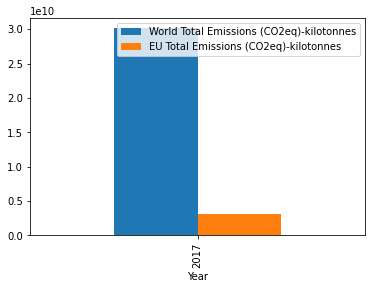

In [46]:
df_2017.plot(x="Year", y=["World Total Emissions (CO2eq)-kilotonnes", "EU Total Emissions (CO2eq)-kilotonnes"], kind="bar")

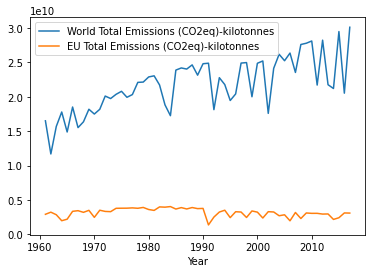

In [29]:
# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
df_task_1.plot(kind='line', x='Year', y='World Total Emissions (CO2eq)-kilotonnes', ax=axes);
df_task_1.plot(kind='line', x='Year', y='EU Total Emissions (CO2eq)-kilotonnes', ax=axes);


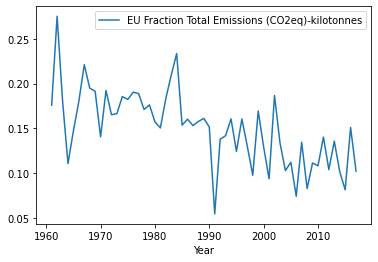

In [30]:
axes = plt.gca()

# pass the axes object to plot function
df_task_1.plot(kind='line', x='Year', y='EU Fraction Total Emissions (CO2eq)-kilotonnes', ax=axes);


In [14]:
# Calculate fractions for task 2

# Add prefix to Columns
eu_rename_dict = {name : 'EU, ' + name for name in CO2_cols}
df_eu = df_eu.rename(columns = eu_rename_dict)

world_rename_dict = {name : 'World, ' + name for name in CO2_cols}
df_total = df_total.rename(columns = world_rename_dict)

df_task_2 = df_eu.merge(df_total, how='left', on='Year')

for col in CO2_cols:
    df_task_2['Ratio, ' + col] = df_task_2['EU, ' + col] / df_task_2['World, ' + col]

ratio_cols = ['Ratio, ' + col for col in CO2_cols]
df_task_2 = df_task_2[['Year'] + ratio_cols]

In [15]:
# Calculate the average CO2 Emssion per produced 100 gram
co2_mat = df_agr[CO2_cols].to_numpy()
prod_mat = df_agr.drop(columns=['Year', 'Area'] + CO2_cols).to_numpy()
co2_mat = np.divide(co2_mat, prod_mat)
co2_vec = co2_mat[:,-1] 
# scale from tons to 100 grams
co2_vec = co2_vec / 10000

df = df.dropna(subset=['Daily Value'])
daily_vec = df['Daily Value'].to_numpy()

nut_mat = df.drop(columns=['Daily Value']).to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [16]:
def cost_function(input_vector):
    nut_vec = np.matmul(nut_mat, input_vector)
    constraint = nut_vec - daily_vec
    constraint = np.any(constraint < 0)
    
    cost = input_vector * co2_vec + 10000 * constraint
    return cost